In [80]:
%load_ext autoreload
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


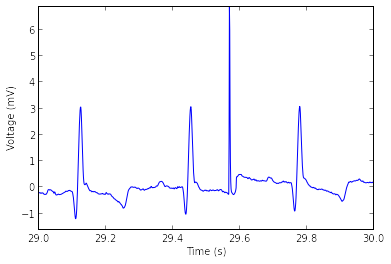

In [81]:
%autoreload
import signal_processing as sp

[t, v] = sp.load_CSV("ziva.csv")

disp_range=[29,30]
sp.display_trace(t, v, disp_range)

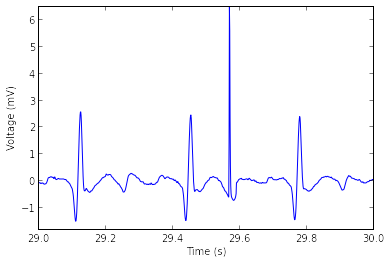

In [82]:
filt_v = sp.HP_filter(t, v, 10, 9)
sp.display_trace(t, filt_v, disp_range)

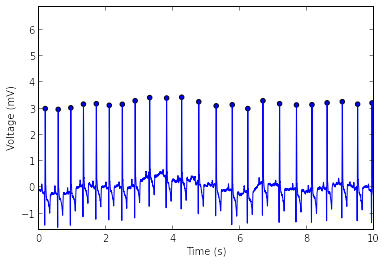

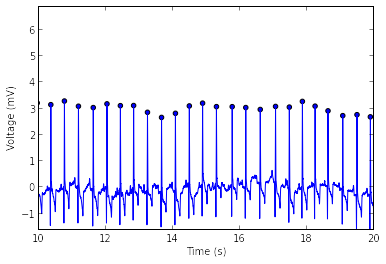

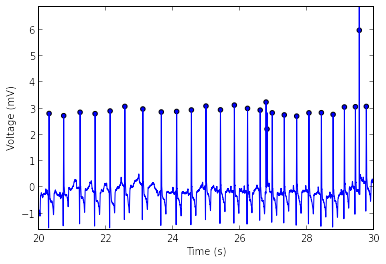

In [83]:
mask = sp.threshold_find_peaks(t, filt_v, .97)
sp.display_trace(t, v, [0, 10], [], True, mask)
sp.display_trace(t, v, [10, 20], [], True, mask)
sp.display_trace(t, v, [20, 30], [], True, mask)

In [88]:
bpm = sp.calc_bpm(t, mask)
print bpm,"beats per minute"

144.578313253 beats per minute


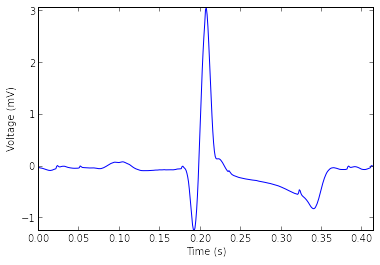

In [85]:
[t_beat, avg_beat] = sp.calc_average_beat(t, v, mask, bpm)
sp.display_trace(t_beat, avg_beat)

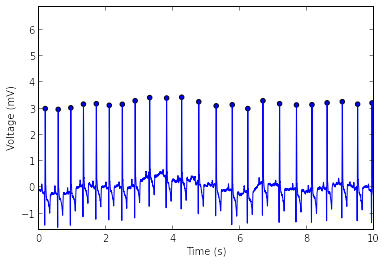

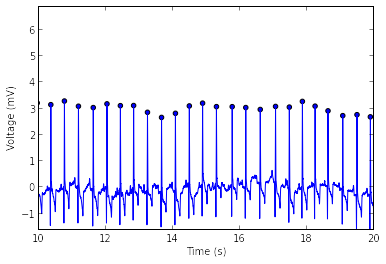

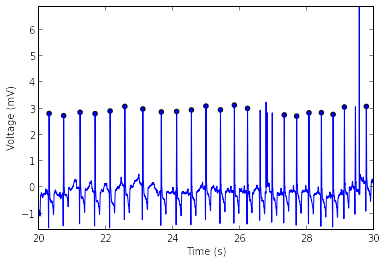

In [86]:
mask_corrected = sp.verify_peaks_ncc(v, mask, avg_beat)
sp.display_trace(t, v, [0, 10], [], True, mask_corrected)
sp.display_trace(t, v, [10, 20], [], True, mask_corrected)
sp.display_trace(t, v, [20, 30], [], True, mask_corrected)

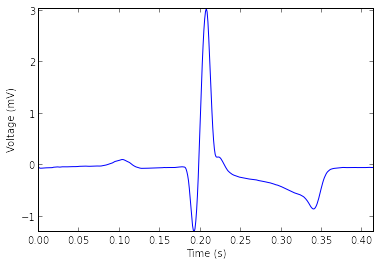

141.176470588 beats per minute


In [89]:
[t_beat_corrected, avg_beat_corrected] = sp.calc_average_beat(t, v, mask_corrected, bpm)
sp.display_trace(t_beat_corrected, avg_beat_corrected)

bpm_corrected = sp.calc_bpm(t, mask_corrected)
print bpm_corrected, "beats per minute"